In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("Strength Training.csv")
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Protoner 16Kg PVC Combo Home Gym Package,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71K-gcsnOY...,https://www.amazon.in/Protoner-16Kg-PVC-Combo-...,3.6,917,₹965.08,"₹4,999"
1,Unisex Hexagon Rubber Vinyl Fixed Dumbbell - P...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71pcrSXprs...,https://www.amazon.in/Generic-Vinyl-Coated-Iro...,4.4,367,₹389,"₹6,450"
2,LAFILLETTE 150 lbs Metal Hand Gripper Forearm ...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/41oTg0XNbF...,https://www.amazon.in/LALA-LIFE-Gripper-Streng...,4.5,381,₹489,"₹1,199"
3,Aurion Genuine Leather Pro Weight Lifting Belt...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/813g2hRYuo...,https://www.amazon.in/Genuine-Comfortable-Adju...,4.4,446,₹799,₹899
4,SPIRO PVC (Round/Hex) Dumbbells (1 Kg. X 2 = 2...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/61VcW8otph...,https://www.amazon.in/Dumbbells-Equipment-Fitn...,3.5,52,₹82.31,₹200


In [7]:
df1 = pd.read_csv("Car Electronics.csv")
df1.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Electronic Spices 2.75 Inch 4ω (Ohm) 400w Max ...,car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/61G5k3T0ff...,https://www.amazon.in/Electronic-Spices-Power-...,NaN,NaN,₹129,₹199
1,"ZQWINT Bluetooth Car Adapter, Mini USB Bluetoo...",car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/51NLOKwNsL...,https://www.amazon.in/ZQWINT-Bluetooth-Transmi...,NaN,NaN,₹219,₹999
2,PROTECTRON 6.35X32mm GLASS FUSE/INVERTER FUSE ...,car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/71St2ruv+N...,https://www.amazon.in/PROTECTRON-6-35X32mm-GLA...,3.8,32,NaN,₹105
3,Cave Maruti Suzuki Male-Female Stereo Coupler ...,car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/31npb8UF2y...,https://www.amazon.in/Maruti-Suzuki-Stereo-Cou...,4.1,7,₹582,₹873
4,COVERBLACK Rubber Back Cover for Infinix X6815...,car & motorbike,Car Electronics,https://m.media-amazon.com/images/I/611zXbVxbN...,https://www.amazon.in/COVERBLACK-Infinix-X6815...,NaN,NaN,₹148,₹799


# Assignment 1 - Store Inventory 

For this assignment you want to build an inventory, such as you might find at a store. There are two key objects that you'll need here (though you may do more if you want/need):

<b>Products:</b>
<ul>
<li> Each item should be a product object, containing: </li>
    <ul>
    <li> A unique id number </li>
    <li> A product name </li>
    <li> A category </li>
    <li> A subcategory </li>
    <li> The URL of an image</li>
    <li> The URL of the product </li>
    <li> A rating (0-5) </li>
    <li> The number of reviews that constituted the rating </li>
    <li> A regular price </li>
    <li> A sale price </li>
    </ul>
<li> Products should have several methods, not limited to, but including: </li>
    <ul>
    <li> A __str__ function that prints the product in a nice format, displaying: </li>
        <ul>
        <li> The product name </li>
        <li> The image </li>
        <li> The product rating </li>
        <li> The product price </li>
        </ul>
    <li> A method to set the discount price - that can accept either a price or a percentage discount as an argument and calculate a new discount price from the actual price </li>
    <li> A method to add a rating to a product </li>
    </ul>
</ul>

<b>Inventory:</b>
<ul>
<li> Each inventory object should keep track of all the products along with a stock level. </li>
<li> The inventory should include methods such as:</li>
    <ul>
    <li> A method to add a new product to the inventory </li>
    <li> A method to remove a product from the inventory </li>
    <li> A method to print all the products in a category in a nice format </li>
    <li> A method to use the + sign to add two inventories together </li>
    <li> A method to get the Top X highest rated products </li>
    <li> A method to change the stock levels for any item in that inventory </li>
    <li> An overload of the length method, to return the number of items in the inventory </li>
    </ul>
</ul>

## Marks and Key Points

There are marks allocated for the following:
<ul>
<li> <b>20%</b> - Error checking - use try/except blocks to catch errors. Specifically check the image loading (some URLs may not work) and the price cleanup (the data may be unclean). </li>
<li> <b>30%</b> - Use of classes and methods - you should have at least the classes constructed with relevant methods. </li>
<li> <b>30%</b> - Output - I will test your code with data that is different, but in the exact same format as the sample. Everything you create should be generic enough to handle any data in the same format. </li>
    <ul>
    <li> At the bottom of your code, please make a section that shows that it works. Load two data files into two inventory objects, display some contents from each, add rating, show the highest rated objects, change a stock level, and add the two inventories together. </li>
    <li> In here, please be clear in what you are showing. Use titled markup blocks to illustrate. You're basically showing, "here's it working". </li>
    </ul>
<li> <b>20%</b> - Code comments and formatting - you should have comments throughout your code explaining what you are doing. Use markup blocks to add a description. </li>
</ul>

### Tips and Hints

<b>Note:</b> I will update the README file in the original repository if I need to add any notes and clarifications. That's likely, as this is obviously open-ended. In general, if you need to make reasonable assumptions, please do so. 

<ul>
<li> The "Show Images" block below shows an example of loading an image from a URL. </li>
<li> Check the parts of error checking other than try/except, they may be useful, depending on what you choose. </li>
<li> You can use the CSV files in the repsoitory for testing, each should work. </li>
<li> If something is really unclear, please ask. </li>
</ul>

#### Show Images


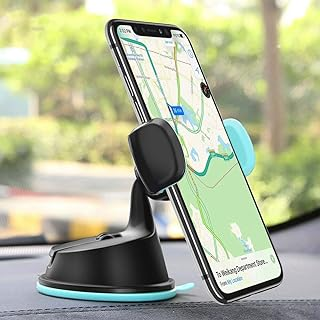

In [8]:
# This code will display an image given a URL
from PIL import Image
import requests

url = df1["image"][5]

im = Image.open(requests.get(url, stream=True).raw)
display(im)

## Classes

In [81]:
class myProduct():
    def __init__(self, name, category, sub_category, image, link, rating, no_of_ratings, discount_price, full_price):
        self.name = name
        self.category = category
        self.sub_category = sub_category
        self.image = image
        self.link = link
        self.rating = rating
        self.no_of_ratings = no_of_ratings
        self.discount_price = discount_price
        self.full_price = full_price
    
    def add_rating(self, new_rating):
        total = self.rating * self.no_of_ratings
        new_rating = (new_rating + total)/(self.no_of_ratings + 1)
        return new_rating
    
    def set_discount(self, discount):
        new_price = self.full_price - ((discount/100) * self.full_price) 
        return new_price
    
    def show_image(self, url):
        url = df["image"][100]
        im = Image.open(requests.get(url, stream=True).raw)
        display(im)

    def __str__(self):
        img = self.show_image(self.image)
        ret_str = f"{self.name}: {img} Product rating: {self.rating}, Product Price: {self.discount_price}"
        return ret_str
    

In [85]:
class myInventory():
    def __init___(self):
        self.products = []
    
    def read_file(self, filename):
        try:
            file = pd.read_csv()
            for line in file:
                self.id, name, category, sub_category, image, link, rating, no_of_ratings, discount_price, full_price = line.split(',')
                product = myProduct(name, category, sub_category, image, link, int(rating), int(no_of_ratings), float(discount_price.lstrip), float(full_price))
                self.products.append(product)
                self.id =+ 1
        except FileNotFoundError:
            print(f"File '{filename}' not found.")
    
    def add_product(self, new_product):
        new_product = myProduct()
        self.products.append(new_product)
        return self.products

    def remove_product(self, product):
        self.products.remove(product)
        return self.products

    def print_inv(self):
        pass

    def __add__(self, other):
        return self.products + other.products
    
    def print_top_rated(self, number):
        pass

    def adjust_stock(self, product):
        pass 

    def __len__(self):
        length = len(self.products)
        return length

In [86]:
inv = myInventory()
inv.read_file("Strength Training.csv")

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [ ]:
with open(filename, 'r') as file:
                header = next(file) 

In [32]:
with open("Strength Training.csv", "r") as f:
    inv = f.readlines()
print(inv)

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 7816: character maps to <undefined>

## Testing

This stuff should work...

You should also add more testing, that can be built into your final part of code. 

In [27]:
df = pd.read_csv("Strength Training.csv")
print(df)

                                                   name     main_category  \
0              Protoner 16Kg PVC Combo Home Gym Package  sports & fitness   
1     Unisex Hexagon Rubber Vinyl Fixed Dumbbell - P...  sports & fitness   
2     LAFILLETTE 150 lbs Metal Hand Gripper Forearm ...  sports & fitness   
3     Aurion Genuine Leather Pro Weight Lifting Belt...  sports & fitness   
4     SPIRO PVC (Round/Hex) Dumbbells (1 Kg. X 2 = 2...  sports & fitness   
...                                                 ...               ...   
1099  Body Flow Fitness Olympic Clips, Clamps, Colla...  sports & fitness   
1100  GYM INSANE Gym Equipment Set for Home Gym Work...  sports & fitness   
1101  ROCKFIT PVC 1KG to 5KG Dumbbell Set for Home G...  sports & fitness   
1102  Urdhvamurti 3 in 1 Multi Usage 5 Detachable Ch...  sports & fitness   
1103  Arcado 5kg Dumbbells Set of 2 / Gym Dumbels Se...  sports & fitness   

           sub_category                                              image 

In [12]:
df1 = pd.read_csv("Car Electronics.csv")
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Protoner 16Kg PVC Combo Home Gym Package,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71K-gcsnOY...,https://www.amazon.in/Protoner-16Kg-PVC-Combo-...,3.6,917,₹965.08,"₹4,999"
1,Unisex Hexagon Rubber Vinyl Fixed Dumbbell - P...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71pcrSXprs...,https://www.amazon.in/Generic-Vinyl-Coated-Iro...,4.4,367,₹389,"₹6,450"
2,LAFILLETTE 150 lbs Metal Hand Gripper Forearm ...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/41oTg0XNbF...,https://www.amazon.in/LALA-LIFE-Gripper-Streng...,4.5,381,₹489,"₹1,199"
3,Aurion Genuine Leather Pro Weight Lifting Belt...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/813g2hRYuo...,https://www.amazon.in/Genuine-Comfortable-Adju...,4.4,446,₹799,₹899
4,SPIRO PVC (Round/Hex) Dumbbells (1 Kg. X 2 = 2...,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/61VcW8otph...,https://www.amazon.in/Dumbbells-Equipment-Fitn...,3.5,52,₹82.31,₹200


In [24]:
with open("Strength Training.csv") as f:
    for line in f:
        print(line)

name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price

Protoner 16Kg PVC Combo Home Gym Package,sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71K-gcsnOYL._AC_UL320_.jpg,https://www.amazon.in/Protoner-16Kg-PVC-Combo-Package/dp/B08HZ7MY7T/ref=sr_1_97?qid=1679218003&s=sports&sr=1-97,3.6,917,â‚¹965.08,"â‚¹4,999"

"Unisex Hexagon Rubber Vinyl Fixed Dumbbell - Pair Set Hand Weights for Strength Training - Weight Loss, Workout Bench, Gym...",sports & fitness,Strength Training,https://m.media-amazon.com/images/I/71pcrSXprsL._AC_UL320_.jpg,https://www.amazon.in/Generic-Vinyl-Coated-Iron-Dumbbells/dp/B07PM1ZMHK/ref=sr_1_98?qid=1679218003&s=sports&sr=1-98,4.4,367,â‚¹389,"â‚¹6,450"

LAFILLETTE 150 lbs Metal Hand Gripper Forearm Wrist Heavy Strength Exercise Hand Grip/Fitness Grip (Black),sports & fitness,Strength Training,https://m.media-amazon.com/images/I/41oTg0XNbFL._AC_UL320_.jpg,https://www.amazon.in/LALA-LIFE-Gripper-Strength-Ex

UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 7816: character maps to <undefined>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104 entries, 0 to 1103
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1104 non-null   object
 1   main_category   1104 non-null   object
 2   sub_category    1104 non-null   object
 3   image           1104 non-null   object
 4   link            1104 non-null   object
 5   ratings         897 non-null    object
 6   no_of_ratings   897 non-null    object
 7   discount_price  1046 non-null   object
 8   actual_price    1088 non-null   object
dtypes: object(9)
memory usage: 77.8+ KB


In [ ]:
# Create an inventory from the supplied file. 
inv = myInventory()
inv.read_file("Strength Training.csv")

In [ ]:
#inv.printNext()

In [ ]:
##inv.printTopRated()

Test 2

In [ ]:
inv2 = myInventory()
#inv2.read_file("Car Electronics.csv")
#inv2.printNext()

In [ ]:
#new = inv + inv2
#new.printNext()